In [9]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [29]:
df = pd.read_csv('Datasets/student-performance-dataset.csv')

In [30]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [31]:
df.info

<bound method DataFrame.info of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tut

cluster
 0    2390
-1       2
Name: count, dtype: int64


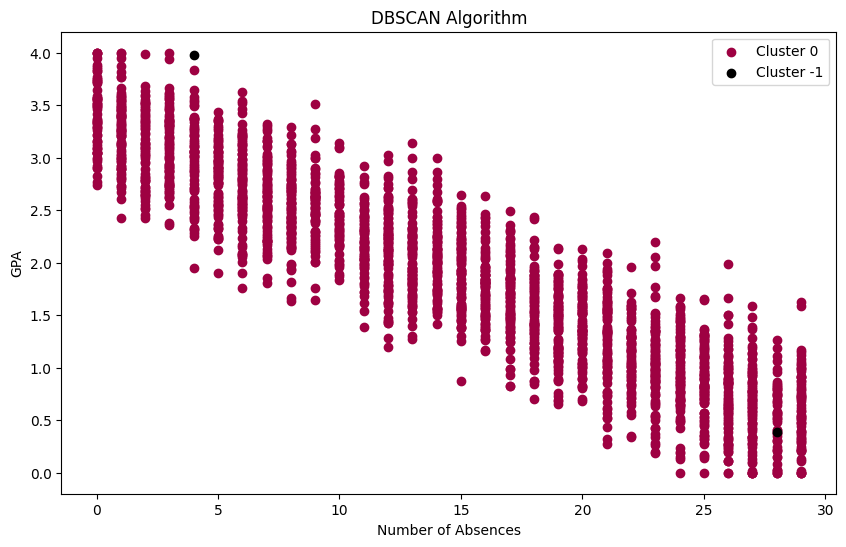

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  cluster  dbscan_label  
0             0  2.929196         2

In [46]:
num_cols = df.select_dtypes(include=['float64']).columns
num_data = df[num_cols]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

# DBSCAN parameters
eps = 1  # Maximum distance for two samples to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples for a point to be considered as a core point

# Run DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster'] = db.fit_predict(scaled_data)

# Check how many points belong to each cluster
print(df['cluster'].value_counts())

plt.figure(figsize=(10, 6))

unique_labels = set(df['cluster'])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a different color
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points = -1
        color = 'k'  # Black for noise
    data_cluster = df[df['cluster'] == label]
    plt.scatter(data_cluster['Absences'], 
                data_cluster['GPA'], 
                color=color, label=f"Cluster {label}")

# Add plot title and labels
plt.title("DBSCAN Algorithm")
plt.xlabel('Number of Absences')
plt.ylabel('GPA')
plt.legend()
plt.show()

# Display the resulting DataFrame with clusters
print(df.head())

In [48]:
num_colums = ['Tutoring','GPA', 'Absences', 'Gender', 'Ethnicity',
                    'ParentalEducation', 'StudyTimeWeekly', 'ParentalSupport',
                    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
num_data = df[num_colums]

# Standardise the data for DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=4, min_samples=5)  # Initial parameters
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the original data
df['dbscan_label'] = dbscan_labels

# Filter rows considered anomalous (label == -1)
anomalous_data = df[df['dbscan_label'] == -1]

# Display the anomalous rows
print(anomalous_data)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass, cluster, dbscan_label]
Index: []


In [51]:
class DB:
    def __init__(self, eps=1.0, minPts=5, equation='euclidean'):
        self.eps = eps # Radius for neighbourhood search
        self.minPts = minPts # Minimum number of points to form a cluster
        self.equation = equation
        
    def fit(self, dataframe):
        # Initialise labels array with -1
        self.labels = np.zeros(len(dataframe), dtype=int) - 1
        self.clusters = [] # List to hold all clusters
        cidx = 0 # Cluster ID counter
        for x in range(len(dataframe)):
            if self.labels[x] == -1:
                neighbours = self.get_neighbours(dataframe, x)
                if len(neighbours) < self.minPts:
                    self.labels[x] = 0 # Mark point as anomaly
                else:
                    cidx += 1
                    self.clusters.append([x])
                    self.labels[x] = cidx # Assign cluster ID to the point

                    # Exapnd the cluster with points
                    for y in neighbours:
                        if self.labels[y] == -1:
                            self.labels[y] = cidx
                            self.clusters[cidx-1].append(y)
                            neighbours2 = self.get_neighbours(dataframe, y)
                            if len(neighbours2) >= self.minPts:
                                neighbours += list(set(neighbours2) - set(neighbours))
                        elif self.labels[y] == 0:
                            self.labels[y] = cidx
                            self.clusters[cidx-1].append(y)
        return self.clusters

    def get_neighbours(self, dataframe, x):
        neighbours = set()
        # Iterate over all points to calculate distances
        for y in range(len(dataframe)):
            if self.distance(dataframe[x], dataframe[y]) <= self.eps: # Check if within eps distance
                neighbours.add(y)
        return list(neighbours)
    
    def distance(self, x, y):
        # Euclidean distance
        return np.sqrt(np.sum((x-y)**2))
                           

    def plot(self, data):
        # Create a 3D plot
        figure = plt.figure(figsize=(10, 8))
        ax = figure.add_subplot(111, projection='3d')

        # Find noise points and clusters
        noise_idx = np.where(self.labels == 0)[0]
        cluster_idxs = [np.array(c) for c in self.clusters]

        # Assign colours to clusters
        colours = cm.rainbow(np.linspace(0, 1, len(self.clusters) + 1))

        # Plot each cluster
        for i, cluster_idx in enumerate(cluster_idxs):
            ax.scatter(data[cluster_idx, 0], data[cluster_idx, 1], data[cluster_idx, 2], 
                       color=colours[i], s=10, label=f'Cluster {i + 1}')

        # Plot anomalies
        if len(noise_idx) > 0:
            ax.scatter(data[noise_idx, 0], data[noise_idx, 1], data[noise_idx, 2], 
                       color='black', s=10, label='Anomalies')

        # Add labels and legend
        ax.set_title("3D DBSCAN Clustering")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        ax.legend()
        plt.show()

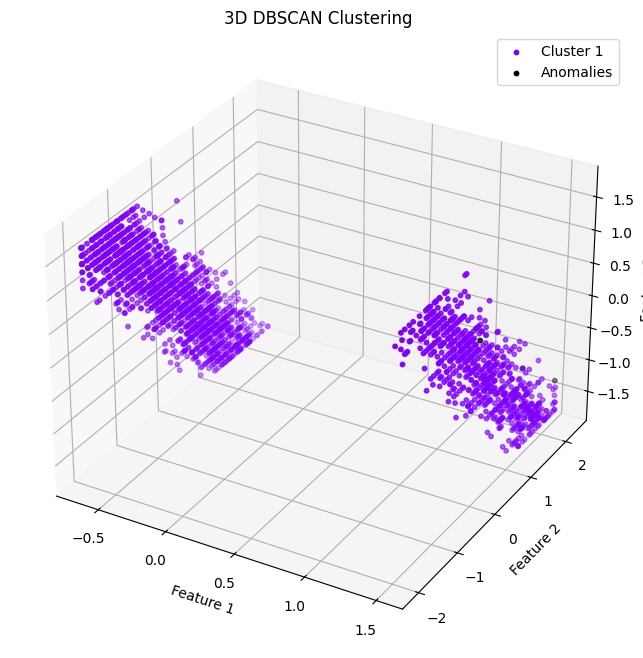

Anomalies:
15
Point 101: [-0.79738659  0.67757365 -1.39445033]
Point 638: [ 0.82381929 -0.68618975 -0.91542773]
Point 675: [ 0.82381929 -0.69748886  0.74099778]
Point 786: [ 0.82381929 -0.02146947 -1.27263488]
Point 1004: [ 0.82381929 -0.52292949 -1.70504657]
Point 1099: [-1.60798953  1.36380913  0.89745116]
Point 1149: [ 0.82381929 -1.03047262  1.19155373]
Point 1322: [-0.79738659  0.66783211 -1.12696326]
Point 1627: [-1.60798953  1.30913065  1.78150273]
Point 1822: [ 0.82381929 -0.99882534 -1.34714256]
Point 2221: [-1.60798953  0.09411572 -0.09920598]
Point 2285: [-1.60798953  0.20707021 -1.65941327]
Point 2318: [-0.79738659  0.7540456   0.5607997 ]
Point 2354: [ 0.82381929  2.26591808 -1.452069  ]
Point 2375: [-2.41859247 -0.81057476  1.61959623]


In [52]:
scaler = StandardScaler()
data = scaler.fit_transform(df[['Tutoring','GPA', 'Absences', 'Gender', 'Ethnicity',
                                    'ParentalEducation', 'StudyTimeWeekly', 'ParentalSupport',
                                    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']])
db = DB(3, 5)
db.fit(data)
db.plot(data)
anomalies = np.where(db.labels == 0)[0]

# Print each Anomaly
print("Anomalies:")
print(len(anomalies))
for i in anomalies:
    print(f"Point {i}: {dataframe[i]}")